0


AttributeError: 'Wavefront' object has no attribute 'max'

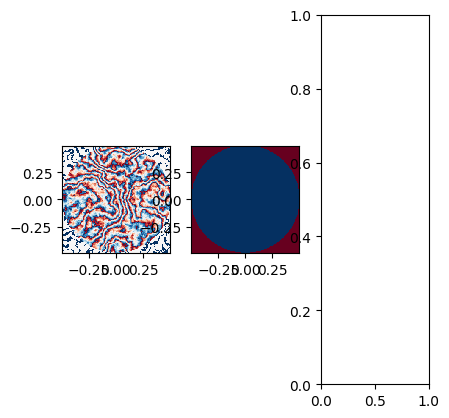

In [5]:
from hcipy import *
import numpy as np
import matplotlib.pyplot as plt
import time

from hcipy.atmosphere import *

from data_utils import create_atmospheric_layers



D_tel = 8.2
wavelength = 1e-6

pupil_grid = make_pupil_grid(512, D_tel)
focal_grid = make_focal_grid(q=8, num_airy=16, spatial_resolution=wavelength/D_tel)
prop = FraunhoferPropagator(pupil_grid, focal_grid)

aperture = make_circular_aperture(D_tel)(pupil_grid)

fried_parameter = 0.2 # meter
outer_scale = 20 # meter
velocity = 10 # meter/sec

Cn_squared = Cn_squared_from_fried_parameter(fried_parameter, 500e-9)
layer = InfiniteAtmosphericLayer(pupil_grid, Cn_squared, outer_scale, velocity)

wf = Wavefront(aperture, wavelength)

wavefronts = []
for t in range(1):
    print(t)
    layer.reset()
    propagated_wavefront = prop(layer(wf))
    
    plt.clf()
    plt.subplot(1,4,1)
    imshow_field(wf2.phase, cmap='RdBu')
    plt.subplot(1,4,2)
    imshow_field(wf2.amplitude, cmap='RdBu')
    plt.subplot(1,4,3)
    imshow_field(np.log10(img / img.max()), vmin=-6)
    plt.subplot(1,4,4)
    imshow_field(np.log10(focal_wf.intensity/ focal_wf.intensity.max()), vmin=-6)
    plt.draw()
    plt.pause(0.00001)
    print(img.shape)



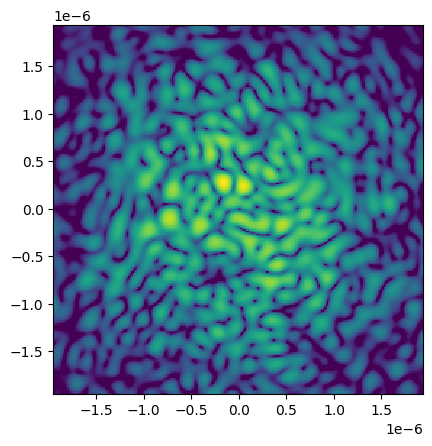

In [6]:
imshow_field(np.log10(img.intensity / img.intensity.max()), grid=focal_grid, vmin=-3)


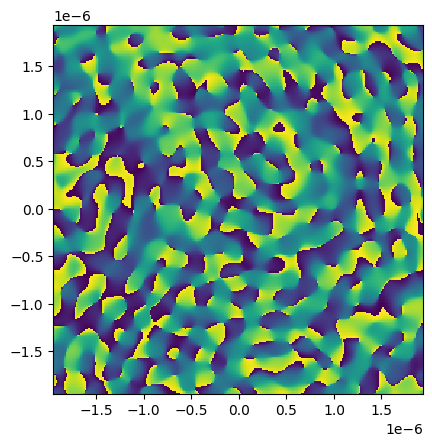

In [7]:
imshow_field(img.phase)

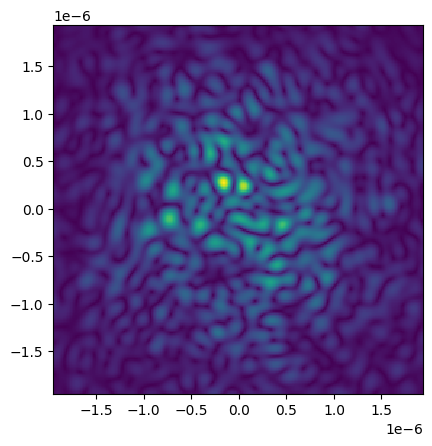

In [8]:
imshow_field(img.amplitude)

In [14]:
256*256

65536

In [13]:
len(img.phase)

65536

In [15]:
from data_utils import fuse_amplitude_and_phase, save_numpy_array

wavefronts = [img]
cubes = np.zeros((len(wavefronts), 256, 256), dtype='complex')

for i in range(len(wavefronts)):
    amplitude = np.array([wavefronts[i].amplitude])
    phase = np.array([wavefronts[i].phase])
    comp_amp_phase = amplitude + phase*1j
    comp_amp_phase = comp_amp_phase.reshape((256, 256))
    cubes[i] = comp_amp_phase

In [18]:
np.save('single_wavefront.npy', cubes)


In [17]:
#wavefronts_file_name = f"{WAVEFRONT_FILE_PREFEIX}01{NUMPY_SUFFIX}"
save_numpy_array(cubes, 'single_wavefront.npy', single_precision=False)

AttributeError: module 'posixpath' has no attribute 'isFile'